In [31]:
! pip install numpy
! pip install pandas
! pip install ucimlrepo
! pip install scikit-learn
! pip install matplotlib


import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate





[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
 
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets.squeeze()

  
# Splitting training and test data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))





Random Forest Results:
Accuracy: 0.7672316384180791
              precision    recall  f1-score   support

     Dropout       0.80      0.76      0.78       284
    Enrolled       0.56      0.34      0.42       159
    Graduate       0.79      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



Model Selection:

In this assigment I would have implemented two models; Logistic Regression and Random Forest. Ultimately I decided to go with random forest which produced very similiar but slightly better results when compared to Logistic Regression. The choice to go with random forest was due to it's ability to provides feature importance scores, which are valuable for understanding which student characteristics most affect outcomes and it typically outperforms linear models on structured datasets and it is typically better for prediction which is our goal for this assignment.

Model Validation: 

I used train and test split (80/20) with stratification to maintain class balance. This ensures that the model is trained on a representative subset of the data while holding out unseen data for evaluation. Stratification is important in this dataset, since student dropout/success classes may be imbalanced. I prioritized simplicity and quick evaluation in this assignment, which is why a single train-test split was used.

Alternative validation strategies which could have been used include:

K-Fold Cross-Validation: Splitting the dataset into k folds provides a more robust performance estimate by training and testing across multiple splits.

Stratified K-Fold Cross-Validation: This makes sure each fold has the same class distribution, which is particularly important when predicting student outcomes.

Nested Cross-Validation: Useful for hyperparameter tuning and avoiding overfitting.


Model Evaluation:

In this notebook I am reporting Accuracy and classifications of Precision, Recall, F1-score for Random Forest.

Metrics used and Findings:

Accuracy and F1 Score: Accuracy measures overall correctness of the model and the F1 Score is the Harmonic mean of precision and recall, balancing both when class imbalance exists. Random Forest slightly outperforms logistic regression in both areas and is able to highlights the most influential features

Precision: This indicates how many predicted “success/dropout” cases were correct. In my comparison Random forest also peformed slightly better than Logistic regression

Recall: This indicates how many actual “success/dropout” cases were identified. Recall for both models were identical

In this next section we are able to extract the top 10 most important features:


Top 10 Important Features for Dropout Prediction:
Curricular units 2nd sem (approved): 0.1552
Curricular units 2nd sem (grade): 0.0916
Curricular units 1st sem (approved): 0.0892
Curricular units 1st sem (grade): 0.0653
Admission grade: 0.0435
Tuition fees up to date: 0.0399
Age at enrollment: 0.0396
Curricular units 2nd sem (evaluations): 0.0381
Previous qualification (grade): 0.0378
Curricular units 1st sem (evaluations): 0.0372


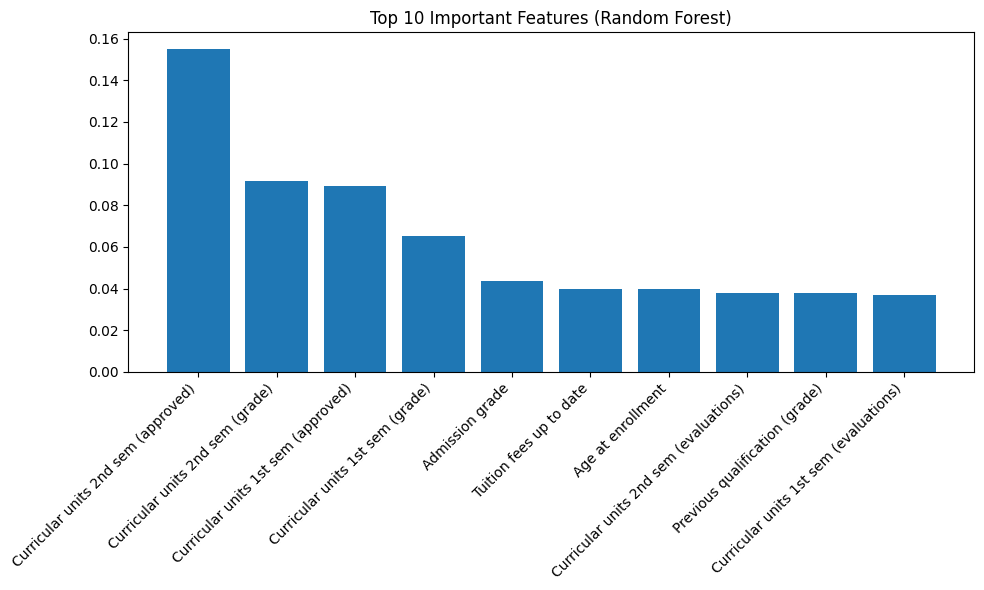

In [33]:
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print top 10 features
print("\nTop 10 Important Features for Dropout Prediction:")
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot top 10 features
plt.figure(figsize=(10,6))
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45, ha="right")
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()